![cactus](http://cactuscode.org/global/images/cactuslogo.png)
# Compiling Cactus!
Step 1 is to download the code. Cactus uses a script named "GetComponents" to find and prepare all the source code modules that it needs for a given installation. The GetComponents script can be downloaded with a simple invocation of curl.

In [26]:
import os
#os.environ["PATH"]="/opt/conda/envs/python2/bin:"+os.environ["PATH"]

In [27]:
!python --version

Python 2.7.12


In [28]:
etk_dir = '/home/ejwest/ETK'

In [29]:
%cd $etk_dir

/home/ejwest/ETK


In [11]:
!curl -kLO https://raw.githubusercontent.com/gridaphobe/CRL/ET_2018_02/GetComponents

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   99k  100   99k    0     0   379k      0 --:--:-- --:--:-- --:--:--  381k


Step 2 is to download your thornlist. In this tutorial, we are going to use Funwave, a collection of thorns
designed to simulate water waves using the Boussinesq equations.

In [12]:
!curl -O -L https://bitbucket.org/stevenrbrandt/cajunwave/raw/master/funwave_carpet.th

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3994  100  3994    0     0   7453      0 --:--:-- --:--:-- --:--:--  7465


You can view a file in the notebook by using the "magic" command "%pycat filename". However, it tries to highlight
syntax as if the file is written in python. In those cases you can simply use "%cat filename." Unfortunately, unlike %pycat, %cat leaves the contents of the file on the screen.

Note that at the top of the file is "DEFINE_ROOT = CactusFW2". This means that Cactus, and all its thorns, will be checked out under that directory.

In [13]:
%pycat ./funwave_carpet.th

Next we need to checkout the components listed in the thornlist. We do this with the GetComponents command.
Before we can execute it, however, we need to turn on its execute bit.

In [14]:
!chmod a+x GetComponents
!echo no|./GetComponents --parallel funwave_carpet.th

-----------------------------------------------------------------
  Checking out module: README.md
      from repository: https://bitbucket.org/simfactory/simfactory2.git
                 into: CactusFW2/simfactory
                   as: simfactory2
-----------------------------------------------------------------
  Checking out module: ExternalLibraries/OpenBLAS
      from repository: https://svn.cactuscode.org/projects/ExternalLibraries/OpenBLAS/trunk
                 into: CactusFW2/arrangements
-----------------------------------------------------------------
  Checking out module: ExternalLibraries/OpenCL
      from repository: https://svn.cactuscode.org/projects/ExternalLibraries/OpenCL/trunk
                 into: CactusFW2/arrangements
-----------------------------------------------------------------
  Checking out module: AEIThorns/AEILocalInterp
      from repository: https://bitbucket.org/cactuscode/numerical.git
                 into: CactusFW2/arrangements
----------------

-----------------------------------------------------------------
  Checking out module: Carpet/TestLoopControl
      from repository: https://bitbucket.org/eschnett/carpet.git
                 into: CactusFW2/arrangements
-----------------------------------------------------------------
  Checking out module: Carpet/Timers
      from repository: https://bitbucket.org/eschnett/carpet.git
                 into: CactusFW2/arrangements
-----------------------------------------------------------------
  Checking out module: CactusBase/Boundary
      from repository: https://bitbucket.org/cactuscode/cactusbase.git
                 into: CactusFW2/arrangements
-----------------------------------------------------------------
  Checking out module: CactusCoastal/FunwaveMesh
      from repository: https://bitbucket.org/stevenrbrandt/cajunwave.git
                 into: CactusFW2/arrangements
-----------------------------------------------------------------
  Checking out module: CactusCoastal/

In [36]:
cactus_dir = '/home/ejwest/ETK/CactusFW2'

In [31]:
%cd $cactus_dir

/home/ejwest/ETK/CactusFW2


<img src="http://simfactory.org/global/images/factory.png" width="200px">

# Simfactory
Cactus is normally built with a tool called Simfactory. Simfactory, in turn, will call make.
Before it can work, however, it needs to be configured. Please replace... my email address in the
command below with yours. The email address isn't sent anywhere, all it's used for is allowing
Cactus to send job change state notifications to you.

In [18]:
%cd cactus_dir
!./simfactory/bin/sim setup-silent --setup-email=ewest@d.umn.edu

Unknown machine name lagrange


Here we will define some necessary Simulation Factory defaults.


Determining local machine name: lagrange
Creating machine lagrange from generic: machine lagrange [/home/ejwest/ETK/CactusFW2/repos/simfactory2/mdb/machines/lagrange.ini] created successfully

--------------------SUMMARY--------------------:


[default]
user            = ejwest
email           = ewest@d.umn.edu
allocation      = NO_ALLOCATION


------------------END SUMMARY------------------:

Contents successfully written to /home/ejwest/ETK/CactusFW2/repos/simfactory2/etc/defs.local.ini


At long last, we are ready to actually build Cactus. Cactus can often figure out what compilers and build
options to use automatically, but in some cases it is necessary to specify it by hand (you can do this by adding --optionlist=centos.cfg to the build command below). The file containing
this information is called the Option List. You might want to take a look at it.

To start from a clean slate, let's remove any previous configurations. (Otherwise, comment out the following lines.)

In [33]:
#%cd $cactus_dir
#!rm -rf ./configs

This is the command to build Cactus using our thornlist. As written, it will build in parallel using two processes. That's what the -j option does.

In [35]:
%cd $cactus_dir
!time ./simfactory/bin/sim build -j2 --thornlist=repos/cajunwave/funwave_carpet.th 

/home/ejwest/ETK/CactusFW2
Using configuration: sim
Updated thorn list for configuration sim
Building sim
Cactus - version: 4.2.3
Building configuration sim
Reconfiguring thorns
Reading ThornList...
Parsing configuration files...
Parsing interface files...
   AEILocalInterp
           Implements: AEILocalInterp
           0 Public, 0 Protected, 0 Private variable groups
   Boundary
           Implements: boundary
           0 Public, 0 Protected, 0 Private variable groups
   Cactus
           Implements: Cactus
           0 Public, 0 Protected, 0 Private variable groups
   Carpet
           Implements: Driver
           0 Public, 0 Protected, 6 Private variable groups
   CarpetEvolutionMask
           Implements: CarpetEvolutionMask
           2 Public, 0 Protected, 0 Private variable groups
   CarpetIOASCII
           Implements: IOASCII
           0 Public, 0 Protected, 3 Private variable groups
   CarpetIOBasic
           Implements: IOBasic
           Inherits:  IO 
           0 Pu

          0 Global, 0 Restricted, 13 Private parameters
   IOUtil
          0 Global, 59 Restricted, 2 Private parameters
   InitBase
          0 Global, 1 Restricted, 0 Private parameters
   InterpToArray
          0 Global, 93 Restricted, 0 Private parameters
   LocalInterp
          0 Global, 0 Restricted, 0 Private parameters
   LocalReduce
          0 Global, 0 Restricted, 0 Private parameters
   LoopControl
          0 Global, 0 Restricted, 20 Private parameters
   MPI
          0 Global, 0 Restricted, 0 Private parameters
   MoL
          0 Global, 9 Restricted, 26 Private parameters
   NaNChecker
          0 Global, 0 Restricted, 11 Private parameters
   SpaceMask
          0 Global, 1 Restricted, 0 Private parameters
   SphericalSurface
          0 Global, 15 Restricted, 9 Private parameters
   SymBase
          0 Global, 0 Restricted, 1 Private parameters
   SystemTopology
          0 Global, 0 Restricted, 2 Private parameters
   TestCarpetGridInfo
          0 Global, 0 Restr

COMPILING arrangements/Carpet/LoopControl/src/loopcontrol_types.F90
/home/ejwest/ETK/CactusFW2/configs/sim/build/LoopControl/loopcontrol_types.f90:6:22:

      integer*8 :: v(3)
                      1
/home/ejwest/ETK/CactusFW2/configs/sim/build/LoopControl/loopcontrol_types.f90:16:44:

      integer*8     :: coarse_thread_info_ptr
                                            1
/home/ejwest/ETK/CactusFW2/configs/sim/build/LoopControl/loopcontrol_types.f90:17:43:

      integer          :: coarse_thread_done
                                           1
/home/ejwest/ETK/CactusFW2/configs/sim/build/LoopControl/loopcontrol_types.f90:21:36:

      integer*8     :: selftest_array
                                    1
COMPILING arrangements/Carpet/LoopControl/src/loopcontrol.F90
COMPILING arrangements/Carpet/LoopControl/src/type_sizes.F90
COMPILING configs/sim/bindings/build/LoopControl/cctk_ThornBindings.c
Creating /home/ejwest/ETK/CactusFW2/configs/sim/lib/libthorn_LoopControl.a
Checking st

COMPILING arrangements/Carpet/Carpet/src/LoadBalanceReal/carpet_boxtypes.F90
COMPILING arrangements/Carpet/Carpet/src/LoadBalanceReal/splitregions_recursively.F90
COMPILING arrangements/Carpet/Carpet/src/LoadBalanceReal/splitregions_recursively.cc
COMPILING configs/sim/bindings/build/Carpet/cctk_ThornBindings.c
Creating /home/ejwest/ETK/CactusFW2/configs/sim/lib/libthorn_Carpet.a
Checking status of thorn CarpetEvolutionMask
COMPILING arrangements/Carpet/CarpetEvolutionMask/src/evolution_mask.cc
COMPILING arrangements/Carpet/CarpetEvolutionMask/src/evolution_mask_init.c
COMPILING arrangements/Carpet/CarpetEvolutionMask/src/evolution_mask_enforce.c
COMPILING configs/sim/bindings/build/CarpetEvolutionMask/cctk_ThornBindings.c
Creating /home/ejwest/ETK/CactusFW2/configs/sim/lib/libthorn_CarpetEvolutionMask.a
Checking status of thorn CarpetIOASCII
COMPILING arrangements/Carpet/CarpetIOASCII/src/ioascii.cc
COMPILING configs/sim/bindings/build/CarpetIOASCII/cctk_ThornBindings.c
Creating /home

COMPILING configs/sim/bindings/build/CarpetIOScalar/cctk_ThornBindings.c
Creating /home/ejwest/ETK/CactusFW2/configs/sim/lib/libthorn_CarpetIOScalar.a
Checking status of thorn CarpetInterp
COMPILING arrangements/Carpet/CarpetInterp/src/interp.cc
COMPILING configs/sim/bindings/build/CarpetInterp/cctk_ThornBindings.c
Creating /home/ejwest/ETK/CactusFW2/configs/sim/lib/libthorn_CarpetInterp.a
Checking status of thorn CarpetInterp2
COMPILING arrangements/Carpet/CarpetInterp2/src/fasterp.cc
COMPILING arrangements/Carpet/CarpetInterp2/src/interp2.cc
COMPILING configs/sim/bindings/build/CarpetInterp2/cctk_ThornBindings.c
Creating /home/ejwest/ETK/CactusFW2/configs/sim/lib/libthorn_CarpetInterp2.a
Checking status of thorn CarpetMask
COMPILING arrangements/Carpet/CarpetMask/src/mask_excluded.cc
COMPILING arrangements/Carpet/CarpetMask/src/mask_surface.cc
COMPILING configs/sim/bindings/build/CarpetMask/cctk_ThornBindings.c
Creating /home/ejwest/ETK/CactusFW2/configs/sim/lib/libthorn_CarpetMask.a

COMPILING arrangements/CactusBase/Fortran/src/paramcheck.F90
COMPILING configs/sim/bindings/build/Fortran/cctk_ThornBindings.c
Creating /home/ejwest/ETK/CactusFW2/configs/sim/lib/libthorn_Fortran.a
Checking status of thorn Funwave
COMPILING arrangements/CactusCoastal/Funwave/src/init.cc
COMPILING arrangements/CactusCoastal/Funwave/src/evo.cc
/home/ejwest/ETK/CactusFW2/configs/sim/build/Funwave/evo.cc: In function ‘void funwave_estimate_huv(cGH*)’:
/home/ejwest/ETK/CactusFW2/configs/sim/build/Funwave/evo.cc:444:14: warning: variable ‘trigger’ set but not used [-Wunused-but-set-variable]
         bool trigger = false;
              ^
/home/ejwest/ETK/CactusFW2/configs/sim/build/Funwave/evo.cc:441:8: warning: variable ‘rhs’ set but not used [-Wunused-but-set-variable]
    int rhs=0;
        ^
COMPILING arrangements/CactusCoastal/Funwave/src/molregister.cc
COMPILING arrangements/CactusCoastal/Funwave/src/fluxes.cc
COMPILING arrangements/CactusCoastal/Funwave/src/sourceterms.cc
COMPILING ar

COMPILING arrangements/CactusBase/IOBasic/src/OutputInfo.c
COMPILING arrangements/CactusBase/IOBasic/src/WriteScalar.c
COMPILING arrangements/CactusBase/IOBasic/src/WriteInfo.c
COMPILING configs/sim/bindings/build/IOBasic/cctk_ThornBindings.c
Creating /home/ejwest/ETK/CactusFW2/configs/sim/lib/libthorn_IOBasic.a
Checking status of thorn InitBase
COMPILING configs/sim/bindings/build/InitBase/cctk_ThornBindings.c
Creating /home/ejwest/ETK/CactusFW2/configs/sim/lib/libthorn_InitBase.a
Checking status of thorn InterpToArray
COMPILING arrangements/CactusNumerical/InterpToArray/src/interp.c
COMPILING configs/sim/bindings/build/InterpToArray/cctk_ThornBindings.c
Creating /home/ejwest/ETK/CactusFW2/configs/sim/lib/libthorn_InterpToArray.a
Checking status of thorn LocalInterp
COMPILING arrangements/CactusNumerical/LocalInterp/src/Startup.c
COMPILING arrangements/CactusNumerical/LocalInterp/src/Operator.c
COMPILING arrangements/CactusNumerical/LocalInterp/src/Interpolate.c
COMPILING configs/sim/

COMPILING configs/sim/bindings/build/TestLoopControl/cctk_ThornBindings.c
Creating /home/ejwest/ETK/CactusFW2/configs/sim/lib/libthorn_TestLoopControl.a
Checking status of thorn Time
COMPILING arrangements/CactusBase/Time/src/Courant.c
COMPILING arrangements/CactusBase/Time/src/Given.c
COMPILING arrangements/CactusBase/Time/src/Initialise.c
COMPILING arrangements/CactusBase/Time/src/Simple.c
COMPILING configs/sim/bindings/build/Time/cctk_ThornBindings.c
Creating /home/ejwest/ETK/CactusFW2/configs/sim/lib/libthorn_Time.a
Checking status of thorn Tridiagonal
COMPILING arrangements/CactusCoastal/Tridiagonal/src/tridiagonalx.cc
COMPILING arrangements/CactusCoastal/Tridiagonal/src/tridiagonaly.cc
COMPILING configs/sim/bindings/build/Tridiagonal/cctk_ThornBindings.c
Creating /home/ejwest/ETK/CactusFW2/configs/sim/lib/libthorn_Tridiagonal.a
Checking status of thorn Tridiagonal2
COMPILING arrangements/CactusCoastal/Tridiagonal2/src/trid.cc
COMPILING arrangements/CactusCoastal/Tridiagonal2/src/

COMPILING src/util/StoreKeyedData.c
COMPILING src/util/StoreNamedData.c
COMPILING src/util/Misc.c
COMPILING src/util/StoreHandledData.c
COMPILING src/util/SKBinTree.c
COMPILING src/util/Hash.c
COMPILING src/util/Malloc.c
COMPILING src/util/Math.c
COMPILING src/util/String.c
COMPILING src/util/StringList.c
COMPILING src/util/Table.c
COMPILING src/util/Time.c
COMPILING src/util/Network.c
COMPILING src/main/ActiveThorns.c
COMPILING src/main/Banner.c
COMPILING src/main/CactusDefaultInitialise.c
COMPILING src/main/CactusDefaultEvolve.c
COMPILING src/main/CactusDefaultShutdown.c
COMPILING src/main/CactusDefaultMainLoopIndex.c
COMPILING src/main/CallStartupFunctions.c
COMPILING src/main/CommandLine.c
COMPILING src/main/Complex.c
COMPILING src/main/ConfigData.c
COMPILING src/main/Coord.c
COMPILING src/main/DebugDefines.c
COMPILING src/main/DefaultTimers.c
COMPILING src/main/Dummies.c
COMPILING src/main/flesh.cc
COMPILING src/main/FortranWrappers.c
COMPILING src/main/GHExtensions.c
COMPILING sr

COMPILING configs/sim/bindings/Parameters/Vectors_Parameters.c
COMPILING configs/sim/bindings/Parameters/hwloc_Parameters.c
COMPILING configs/sim/bindings/Parameters/zlib_Parameters.c
COMPILING configs/sim/bindings/Variables/BindingsVariables.c
COMPILING configs/sim/bindings/Variables/AEILocalInterp.c
COMPILING configs/sim/bindings/Variables/Boundary.c
COMPILING configs/sim/bindings/Variables/Cactus.c
COMPILING configs/sim/bindings/Variables/Carpet.c
COMPILING configs/sim/bindings/Variables/CarpetEvolutionMask.c
COMPILING configs/sim/bindings/Variables/CarpetIOASCII.c
COMPILING configs/sim/bindings/Variables/CarpetIOBasic.c
COMPILING configs/sim/bindings/Variables/CarpetIOHDF5.c
COMPILING configs/sim/bindings/Variables/CarpetIOScalar.c
COMPILING configs/sim/bindings/Variables/CarpetInterp.c
COMPILING configs/sim/bindings/Variables/CarpetInterp2.c
COMPILING configs/sim/bindings/Variables/CarpetLib.c
COMPILING configs/sim/bindings/Variables/CarpetMask.c
COMPILING configs/sim/bindings/Var

Compiling /home/ejwest/ETK/CactusFW2/arrangements/Carpet/CarpetIOHDF5/src/util/hdf5_slicer.cc
Creating hdf5_slicer in /home/ejwest/ETK/CactusFW2/exe/sim from /home/ejwest/ETK/CactusFW2/configs/sim/build/CarpetIOHDF5/hdf5_slicer.o
Compiling /home/ejwest/ETK/CactusFW2/arrangements/Carpet/CarpetIOHDF5/src/util/hdf5_recombiner.cc
Creating hdf5_recombiner in /home/ejwest/ETK/CactusFW2/exe/sim from /home/ejwest/ETK/CactusFW2/configs/sim/build/CarpetIOHDF5/hdf5_recombiner.o
Compiling /home/ejwest/ETK/CactusFW2/arrangements/ExternalLibraries/HDF5/src/util/hdf5_merge.c
Creating hdf5_merge in /home/ejwest/ETK/CactusFW2/exe/sim from /home/ejwest/ETK/CactusFW2/configs/sim/build/HDF5/hdf5_merge.o
Compiling /home/ejwest/ETK/CactusFW2/arrangements/ExternalLibraries/HDF5/src/util/hdf5_extract.c
Creating hdf5_extract in /home/ejwest/ETK/CactusFW2/exe/sim from /home/ejwest/ETK/CactusFW2/configs/sim/build/HDF5/hdf5_extract.o
Compiling /home/ejwest/ETK/CactusFW2/arrangements/ExternalLibraries/HDF5/src/uti

The build command creates a configuration called "sim". It is found in the "configs/sim" directory. One of the files in this directory is the ThornList. It contains the list of thorns Cactus will compile. If you wish to add or remove a thorn from your configuration, you can do it by editing this file. However, by doing so you risk confusing yourself by forgetting what you've done. Proceed at your own risk!

In [37]:
%ls ./configs/sim

OptionList    ThornList      build/        datestamp.o  properties.ini
RunScript     ThornList.old  config-data/  lib/         scratch/
SubmitScript  bindings/      config-info   piraha/


In [38]:
%pycat ./configs/sim/ThornList

The "OptionList" file contains all the configuration options (the things you saw in centos.cfg). Unlike the ThornList file, however, changing this file will have no effect. If you wish to change your configuration options without starting over from scratch, you should edit the file "configs/sim/config-data/make.config.defn."

In [39]:
%pycat ./configs/sim/config-data/make.config.defn

In [40]:
# Simfactory supplies a config file from its "machine database" or "mdb." This script
# figures out which one it copied by identifying the most similar file in the machine dabase.

# The smaller the number returned by this function, the more
# alike strings a and b are to each other.
def similarity_distance(a,b):
    d = {}
    for c in a:
        if c in d:
            d[c] += 1
        else:
            d[c] = 1
    for c in b:
        if c in d:
            d[c] -= 1
        else:
            d[c] = -1
    sum = 0
    for k in d:
        v = d[k]
        if v < 0:
            sum -= v
        else:
            sum += v
    return sum

import os
my_options = open(os.environ["PWD"]+"/CactusFW2/configs/sim/OptionList").read()
mdb_dir = os.environ["PWD"]+"/CactusFW2/simfactory/mdb/optionlists"
print("mdb_dir="+mdb_dir)
best_choice = None # The best choice for a similar cfg file so far
min_dist = 1e15 # a super big number...
# For each machine in the database
for file in os.listdir(mdb_dir):
    full_path = mdb_dir+"/"+file
    # Read in the contents of the cfg file
    file_options = open(full_path).read()
    dist = similarity_distance(file_options,my_options)
    # Update the best_choice of cfg file if we have
    # a shorter similarity distance.
    if dist < min_dist:
        min_dist = dist
        best_choice = file
print("Most similar optionlist in the Simfactory mdb was:",best_choice)
os.environ["BEST_CHOICE"]=best_choice

FileNotFoundError: [Errno 2] No such file or directory: '/home/ejwest/phy/research/CactusFW2/configs/sim/OptionList'

In [76]:
# Take a look at the cfg file to see what it looks like.
!cat ./repos/simfactory2/mdb/optionlists/${BEST_CHOICE}

# generic

# Whenever this version string changes, the application is configured
# and rebuilt from scratch
VERSION = 2017-09-25

CPP = cpp
CC  = gcc
CXX = g++

FPP = cpp
F77 = gfortran
F90 = gfortran

CPPFLAGS =
FPPFLAGS = -traditional

CFLAGS   = -g -std=gnu99
CXXFLAGS = -g -std=gnu++0x
F77FLAGS = -g -fcray-pointer -ffixed-line-length-none
F90FLAGS = -g -fcray-pointer -ffixed-line-length-none

LDFLAGS = -rdynamic

DEBUG           = no
CPP_DEBUG_FLAGS =
C_DEBUG_FLAGS   =
CXX_DEBUG_FLAGS =

OPTIMISE           = yes
CPP_OPTIMISE_FLAGS =
C_OPTIMISE_FLAGS   = -O2
CXX_OPTIMISE_FLAGS = -O2

PROFILE           = no
CPP_PROFILE_FLAGS =
C_PROFILE_FLAGS   = -pg
CXX_PROFILE_FLAGS = -pg
F77_PROFILE_FLAGS = -pg
F90_PROFILE_FLAGS = -pg

WARN           = yes
CPP_WARN_FLAGS = -Wall
C_WARN_FLAGS   = -Wall
CXX_WARN_FLAGS = -Wall
F77_WARN_FLAGS = -Wall
F90_WARN_FLAGS = -Wall

OPENMP           = yes
CPP_OPENMP_FLAGS = -fopenmp
FPP_OPENMP_FLAGS = -D_OPENMP
C_OPENMP_FLAGS   = -fopenmp
CXX_OPENMP_FLAGS = -fo

<h1>Running Cactus!</h1>

In [77]:
#%cd $cactus_dir

Below we are going to run a simple Gaussian water wave over a flat seabed. We will use MPI and run on two processes. You can edit the parameter file below and hit shift-Enter to write it to disk. The special sequence "%%writefile filename" at the top makes this possible. Alternatively, you can load an existing file by putting the special sequence "%load filename" at the top of a cell and hitting shift-Enter.

In [63]:
%%writefile ./wave.par

#Reorder the parameters for easy comparison to the input.txt in example 3
ActiveThorns = "
  CoordBase FunWave FunwaveCoord CartGrid3D Carpet CarpetIOASCII
  CartGrid3D IOUtil CarpetIOBasic CarpetSlab Boundary SymBase MoL
  CarpetReduce LocalReduce InitBase CarpetLib LoopControl Tridiagonal
  CarpetIOScalar "

#----------------------------------------------------
# Flesh and CCTK parameters
#----------------------------------------------------

# flesh
Cactus::cctk_run_title = "Test Run"
Cactus::cctk_show_schedule = "yes"
Cactus::cctk_itlast = 300
Cactus::allow_mixeddim_gfs = "yes"

# CartGrid3D
CartGrid3D::type = "coordbase"
CartGrid3D::avoid_origin = "no"
CoordBase::domainsize = "minmax"
CoordBase::spacing    = "gridspacing"
CoordBase::xmin =  0
CoordBase::xmax =  30
CoordBase::ymin =  0
CoordBase::ymax =  30
CoordBase::zmin =  0.0
CoordBase::zmax =  0.0
CoordBase::dx   =  0.25
CoordBase::dy   =  0.25

CoordBase::boundary_size_x_lower     = 3
CoordBase::boundary_size_x_upper     = 3
CoordBase::boundary_size_y_lower     = 3
CoordBase::boundary_size_y_upper     = 3
CoordBase::boundary_size_z_lower     = 0
CoordBase::boundary_size_z_upper     = 0
CoordBase::boundary_shiftout_x_lower = 1
CoordBase::boundary_shiftout_x_upper = 1
CoordBase::boundary_shiftout_y_lower = 1
CoordBase::boundary_shiftout_y_upper = 1
CoordBase::boundary_shiftout_z_lower = 1
CoordBase::boundary_shiftout_z_upper = 1

# Carpet
Carpet::domain_from_coordbase = "yes"
Carpet::ghost_size_x = 3
Carpet::ghost_size_y = 3
Carpet::ghost_size_z = 1
carpet::adaptive_stepsize = yes

# MoL
MoL::ODE_Method = "RK3"
MoL::disable_prolongation        = "yes"

# the output dir will be named after the parameter file name
IO::out_dir = $parfile
IO::out_fileinfo="none"
IOBasic::outInfo_every = 1
IOBasic::outInfo_vars = "FunWave::eta FunWave::u FunWave::v"

#IOASCII::out1D_every = 1
#IOASCII::out1d_vars = "FunWave::eta Funwave::depth"
CarpetIOASCII::compact_format = false
IOASCII::out2D_every = 30
IOASCII::out2D_xyplane_z = 0
IOASCII::out2D_vars = "FunWave::eta FunWave::u FunWave::v"
IOASCII::out2D_xz = "no"
IOASCII::out2D_yz = "no"
IOASCII::output_ghost_points = "no"

IOScalar::outScalar_every = 1
IOScalar::outScalar_vars = "FunWave::eta FunWave::u FunWave::v"

#& = "Funwave::eta"

#----------------------------------------------------
# Funwave parameters
#----------------------------------------------------

# Funwave depth 
FunWave::depth_file_offset_x = 3
FunWave::depth_file_offset_y = 3
FunWave::depth_type = "flat"
FunWave::depth_format = "ele"
FunWave::depth_file = "/tmp/__depth__.txt"
FunWave::depth_flat = 0.8
#Funwave::test_depth_shore_x = 80
#Funwave::test_depth_island_x = 40
#Funwave::test_depth_island_y = 40
FunWave::depth_xslp = 10.0
FunWave::depth_slope = 0.05
FunWave::dt_size = 0
Funwave::generate_test_depth_data = true
Funwave::num_wave_components = 1
Funwave::wave_component_file = "/home/sbrandt/workspace/shi_funwave/example_2/fft/wavemk_per_amp_pha.txt"
Funwave::peak_period = 1

# import
Funwave::time_ramp = 1.0
Funwave::delta_wk = 0.5
Funwave::dep_wk = 0.45
Funwave::xc_wk = 3.0
Funwave::ywidth_wk = 10000.0
Funwave::tperiod = 1.0
Funwave::amp_wk = 0.0232
Funwave::theta_wk = 0.0
Funwave::freqpeak = 0.2
Funwave::freqmin = 0.1
Funwave::freqmax = 0.4
Funwave::hmo = 1.0
Funwave::gammatma = 5.0
Funwave::thetapeak = 10.0
Funwave::sigma_theta = 15.0

# Funwave wind forcing
Funwave::wind_force = false
Funwave::use_wind_mask = false
Funwave::num_time_wind_data = 2
Funwave::timewind[0] = 0
Funwave::wu[0] = 25
Funwave::wv[0] = 50
Funwave::timewind[1] = 1000
Funwave::wu[1] = 100
Funwave::wv[1] = 100
Funwave::boundary = funwave

# Funwave wave maker
FunWave::wavemaker_type = "ini_gau"
FunWave::xc = 26.5
FunWave::yc = 26.9
FunWave::amp =  2.0
FunWave::wid =  1
Funwave::wdep = 0.78
Funwave::xwavemaker = 25.0

# Funwave sponge 
FunWave::sponge_on = false
FunWave::sponge_west_width = 2.0
FunWave::sponge_east_width = 2.0
FunWave::sponge_north_width = 0.0
FunWave::sponge_south_width = 0.0
FunWave::sponge_decay_rate = 0.9
FunWave::sponge_damping_magnitude = 5.0

# Funwave dispersion (example 3 enables dispersion)
FunWave::dispersion_on = "true"
FunWave::gamma1 = 1.0
FunWave::gamma2 = 1.0
FunWave::gamma3 = 1.0
FunWave::beta_ref = -0.531
FunWave::swe_eta_dep = 0.80
FunWave::cd = 0.0

# Funwave numerics (MoL parameter controls time integration scheme)
FunWave::reconstruction_scheme = "fourth"
FunWave::riemann_solver = "HLLC"
FunWave::dtfac = 0.5
FunWave::froudecap = 10.0
FunWave::mindepth = 0.001
FunWave::mindepthfrc = 0.001
FunWave::enable_masks = "true"
Funwave::estimate_dt_on = "true"

FunwaveCoord::spherical_coordinates = false

ActiveThorns = "CarpetIOHDF5"
IOHDF5::out2D_xyplane_z = 0 
IOHDF5::out2D_every = 10
IOHDF5::out2D_vars = " 
  FunWave::eta
  FunWave::u
  FunWave::v
  Grid::Coordinates{out_every=1000000000}
"
IOHDF5::out2D_xz = no
IOHDF5::out2D_yz = no

Overwriting ./wave.par


This next cell deletes our simulation in case we want to throw it away and start over again for some reason.

In [64]:
!rm -rf $cactus_dir/../simulations/wave

At long last, we are ready run Cactus. This configuration specifies running on two threads, with 1 thread per process. To execute this command, Cactus uses a "RunScript" stored in configs/sim/RunScript. You might want to take a look at it. Identifiers sandwiched between @ symbols get replaced by Simfactory prior to execution.

In [65]:
!cat ./configs/sim/RunScript

#!/bin/sh

echo "Preparing:"
set -x                          # Output commands
set -e                          # Abort on errors

cd @RUNDIR@-active

echo "Checking:"
pwd
hostname
date

echo "Environment:"
export CACTUS_NUM_PROCS=@NUM_PROCS@
export CACTUS_NUM_THREADS=@NUM_THREADS@
export GMON_OUT_PREFIX=gmon.out
export OMP_NUM_THREADS=@NUM_THREADS@
env | sort > SIMFACTORY/ENVIRONMENT

echo "Starting:"
export CACTUS_STARTTIME=$(date +%s)

if [ ${CACTUS_NUM_PROCS} = 1 ]; then
    if [ @RUNDEBUG@ -eq 0 ]; then
   	  @EXECUTABLE@ -L 3 @PARFILE@
    else
   	  gdb --args @EXECUTABLE@ -L 3 @PARFILE@
    fi
else
	mpirun -np @NUM_PROCS@ @EXECUTABLE@ -L 3 @PARFILE@
fi

echo "Stopping:"
date
echo "Done."


Enough already! Let's run Cactus!

In [66]:
%cd $cactus_dir
!./simfactory/bin/sim submit wave --procs=1 --num-threads=1 --parfile=wave.par

/home/ejwest/phy/research/sandbox/ETK/CactusFW2
Parameter file: /home/ejwest/phy/research/sandbox/ETK/CactusFW2/wave.par
Skeleton Created
Job directory: "/home/ejwest/phy/research/sandbox/ETK/simulations/wave"
Executable: "/home/ejwest/phy/research/sandbox/ETK/CactusFW2/exe/cactus_sim"
Option list: "/home/ejwest/phy/research/sandbox/ETK/simulations/wave/SIMFACTORY/cfg/OptionList"
Submit script: "/home/ejwest/phy/research/sandbox/ETK/simulations/wave/SIMFACTORY/run/SubmitScript"
Run script: "/home/ejwest/phy/research/sandbox/ETK/simulations/wave/SIMFACTORY/run/RunScript"
Parameter file: "/home/ejwest/phy/research/sandbox/ETK/simulations/wave/SIMFACTORY/par/wave.par"
Assigned restart id: 0 
Executing submit command: exec nohup /home/ejwest/phy/research/sandbox/ETK/simulations/wave/output-0000/SIMFACTORY/SubmitScript < /dev/null > /dev/null 2> /dev/null & echo $!
Submit finished, job id is 29230


In [67]:
import os
import re
import sys
import time
while True:
    c = os.popen("./simfactory/bin/sim list-sim wave").read()
    sys.stdout.write(c)
    sys.stdout.flush()
    time.sleep(5)
    if re.search("FINISHED",c):
        break

   wave                    [ACTIVE (RUNNING), restart 0000, job id 29230]
   wave                    [ACTIVE (RUNNING), restart 0000, job id 29230]
   wave                    [ACTIVE (RUNNING), restart 0000, job id 29230]
   wave                    [ACTIVE (FINISHED), restart 0000, job id 29230]


Data can be found in this directory. Using the next couple of commands, we will browse it.

In [98]:
%cd $cactus_dir/../simulations/wave/output-0000/wave

/home/ejwest/phy/research/sandbox/ETK/simulations/wave/output-0000/wave


In [99]:
%ls *.asc

eta.average.asc   eta.norm_inf.asc  u.minimum.asc   v.inorm1.asc
eta.count.asc     eta.sum.asc       u.norm1.asc     v.inorm2.asc
eta.iaverage.asc  eta.xy.asc        u.norm2.asc     v.maximum.asc
eta.icount.asc    u.average.asc     u.norm_inf.asc  v.minimum.asc
eta.inorm1.asc    u.count.asc       u.sum.asc       v.norm1.asc
eta.inorm2.asc    u.iaverage.asc    u.xy.asc        v.norm2.asc
eta.maximum.asc   u.icount.asc      v.average.asc   v.norm_inf.asc
eta.minimum.asc   u.inorm1.asc      v.count.asc     v.sum.asc
eta.norm1.asc     u.inorm2.asc      v.iaverage.asc  v.xy.asc
eta.norm2.asc     u.maximum.asc     v.icount.asc


In [106]:
# This cell enables inline plotting in the notebook
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

The top of %pycat command showed us what the columns mean:
HYDROBASE::rho (hydrobase-rho)
* 1 iteration
* 2 time - how much time has passed in the simulation
* 3 the data, in this case the variable rho

Once we know all this, it is straightforward to plot the data.

In [107]:
lin_data = np.genfromtxt("eta.maximum.asc")

In [108]:
lin_data

array([[0.00000000e+00, 0.00000000e+00, 1.99002496e+00],
       [1.00000000e+00, 1.00000000e+00, 1.94996406e+00],
       [2.00000000e+00, 1.02389304e+00, 1.86241266e+00],
       [3.00000000e+00, 1.04762986e+00, 1.74068787e+00],
       [4.00000000e+00, 1.07107653e+00, 1.59896471e+00],
       [5.00000000e+00, 1.09418298e+00, 1.44762021e+00],
       [6.00000000e+00, 1.11709657e+00, 1.29612256e+00],
       [7.00000000e+00, 1.13978869e+00, 1.15073421e+00],
       [8.00000000e+00, 1.16240215e+00, 1.01413437e+00],
       [9.00000000e+00, 1.18498552e+00, 8.88085934e-01],
       [1.00000000e+01, 1.20757797e+00, 7.71794829e-01],
       [1.10000000e+01, 1.23022266e+00, 6.75431889e-01],
       [1.20000000e+01, 1.25290639e+00, 6.20271677e-01],
       [1.30000000e+01, 1.27523727e+00, 5.96323930e-01],
       [1.40000000e+01, 1.29842338e+00, 5.67023511e-01],
       [1.50000000e+01, 1.32298377e+00, 5.49883317e-01],
       [1.60000000e+01, 1.34764314e+00, 5.26827510e-01],
       [1.70000000e+01, 1.37235

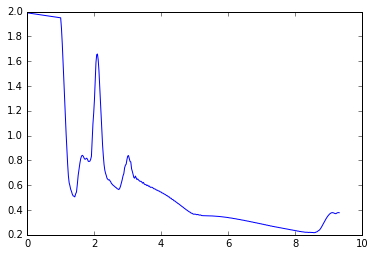

In [109]:
plt.plot(lin_data[:,1],lin_data[:,2])

Python knows how to read regularly formatted text
files that use the # character for comments. Fortunately,
that's what Cactus produces in its asc files.

In [110]:
file_data = np.genfromtxt("eta.xy.asc")

In [111]:
file_data

array([[ 0.00000000e+000,  0.00000000e+000,  0.00000000e+000, ...,
        -7.50000000e-001,  0.00000000e+000,  0.00000000e+000],
       [ 0.00000000e+000,  0.00000000e+000,  0.00000000e+000, ...,
        -7.50000000e-001,  0.00000000e+000,  0.00000000e+000],
       [ 0.00000000e+000,  0.00000000e+000,  0.00000000e+000, ...,
        -7.50000000e-001,  0.00000000e+000,  8.00386346e-322],
       ...,
       [ 3.00000000e+002,  0.00000000e+000,  0.00000000e+000, ...,
         3.07500000e+001,  0.00000000e+000, -4.84401952e-003],
       [ 3.00000000e+002,  0.00000000e+000,  0.00000000e+000, ...,
         3.07500000e+001,  0.00000000e+000, -7.17270258e-003],
       [ 3.00000000e+002,  0.00000000e+000,  0.00000000e+000, ...,
         3.07500000e+001,  0.00000000e+000, -1.18624657e-002]])

In [112]:
import matplotlib.cm as cm
# https://matplotlib.org/examples/color/colormaps_reference.html
cmap = cm.gist_rainbow

sets= [  0.  30.  60.  90. 120. 150. 180. 210. 240. 270. 300.]
which= 0.0
min/max= 0.0 1.99002495838536


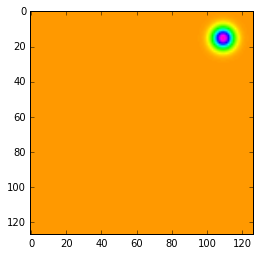

which= 30.0
min/max= -0.207923914074493 0.816352882538347


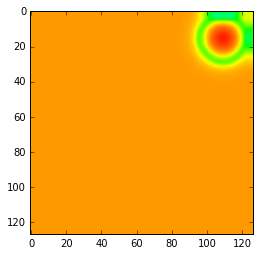

which= 60.0
min/max= -0.317305530717627 0.656520120884679


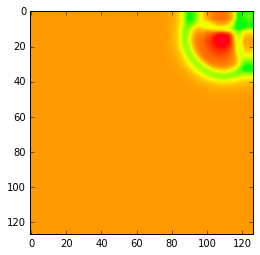

which= 90.0
min/max= -0.181076541393241 0.787317058350942


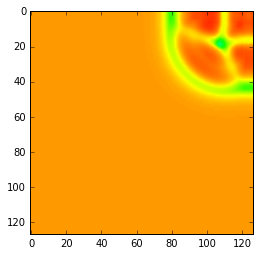

which= 120.0
min/max= -0.324171390451081 0.566769020398611


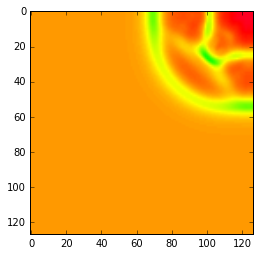

which= 150.0
min/max= -0.331607086078988 0.420832876995567


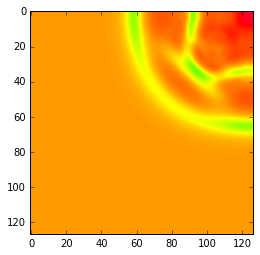

which= 180.0
min/max= -0.182986771806629 0.351955557436342


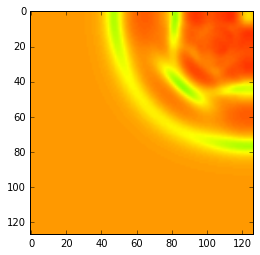

which= 210.0
min/max= -0.177226909316812 0.3191605301746


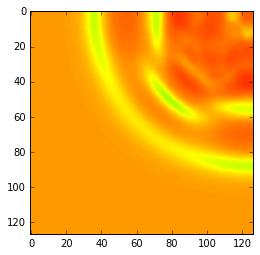

which= 240.0
min/max= -0.172527402131173 0.267072575528818


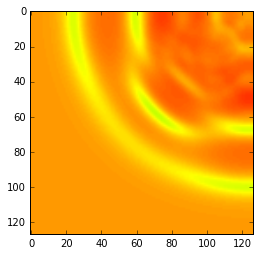

which= 270.0
min/max= -0.156370182449835 0.220940999016735


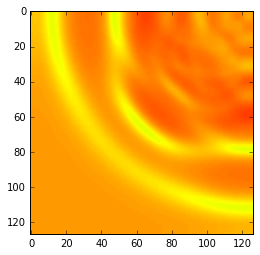

which= 300.0
min/max= -0.137407163976526 0.378204176487749


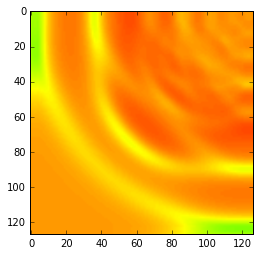

In [113]:
sets = np.unique(file_data[:,0])
width = 8
height = 4
print("sets=",sets)
mn, mx = np.min(file_data[:,12]),np.max(file_data[:,12])
for which in sets: 
    print("which=",which)
    g = file_data[file_data[:,0]==which,:]
    x = g[:,5]
    y = g[:,6]
    z = g[:,12]
    zi = z.reshape(len(np.unique(y)),len(np.unique(x)))
    print('min/max=',np.min(zi),np.max(zi))
    plt.figure(figsize=(width, height))
    plt.imshow(zi[::-1,:],cmap,clim=(mn,mx))
    plt.show()

In [114]:
%ls *.h5

eta.xy.h5  r.xy.h5  u.xy.h5  v.xy.h5  x.xy.h5  y.xy.h5  z.xy.h5


<h2>Plotting HDF5 Data</h2>
HDF5 (Hierarchical Data Format 5) is a portable binary data format. As such, it is far more efficient to read and
write than ascii formats, and it is probably what you should normally use. Here, you can see how to read and display
the data.

In [115]:
import h5py

nm= FUNWAVE::u it=0 tl=0 rl=0


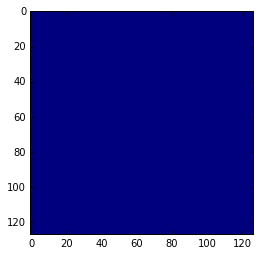

nm= FUNWAVE::u it=10 tl=0 rl=0


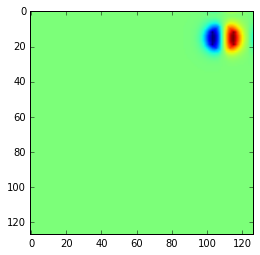

nm= FUNWAVE::u it=100 tl=0 rl=0


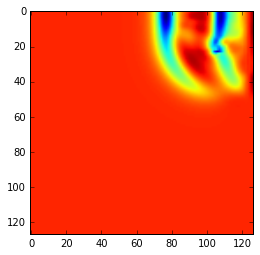

nm= FUNWAVE::u it=110 tl=0 rl=0


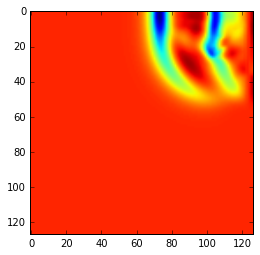

nm= FUNWAVE::u it=120 tl=0 rl=0


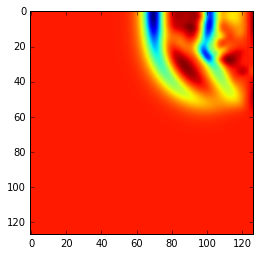

nm= FUNWAVE::u it=130 tl=0 rl=0


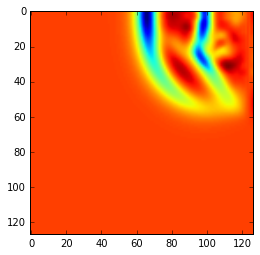

nm= FUNWAVE::u it=140 tl=0 rl=0


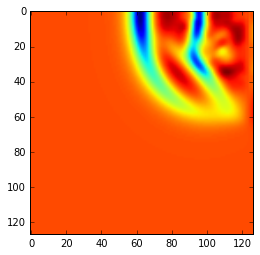

nm= FUNWAVE::u it=150 tl=0 rl=0


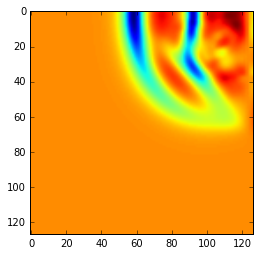

nm= FUNWAVE::u it=160 tl=0 rl=0


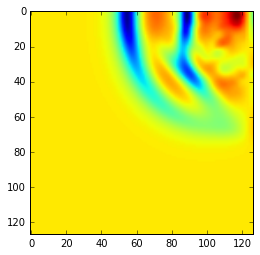

nm= FUNWAVE::u it=170 tl=0 rl=0


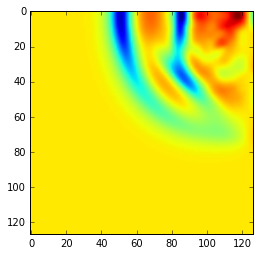

nm= FUNWAVE::u it=180 tl=0 rl=0


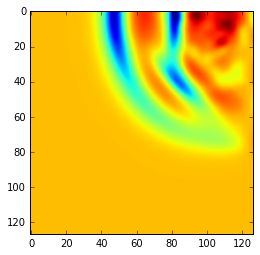

nm= FUNWAVE::u it=190 tl=0 rl=0


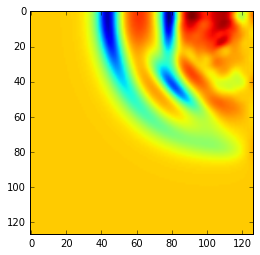

nm= FUNWAVE::u it=20 tl=0 rl=0


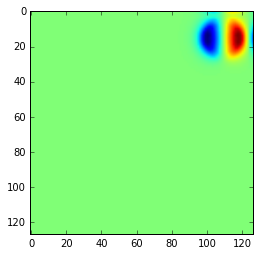

nm= FUNWAVE::u it=200 tl=0 rl=0


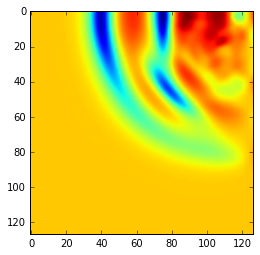

nm= FUNWAVE::u it=210 tl=0 rl=0


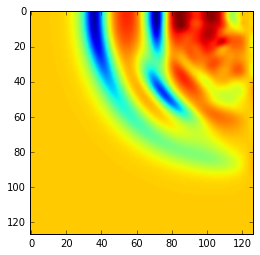

nm= FUNWAVE::u it=220 tl=0 rl=0


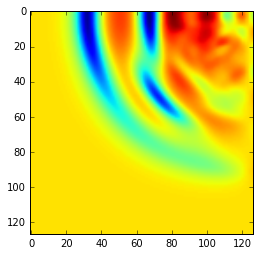

nm= FUNWAVE::u it=230 tl=0 rl=0


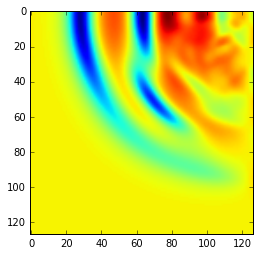

nm= FUNWAVE::u it=240 tl=0 rl=0


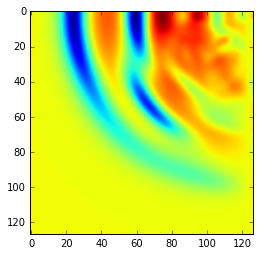

nm= FUNWAVE::u it=250 tl=0 rl=0


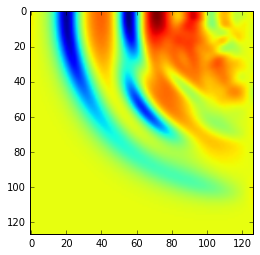

nm= FUNWAVE::u it=260 tl=0 rl=0


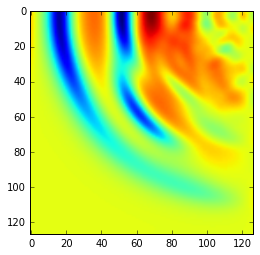

nm= FUNWAVE::u it=270 tl=0 rl=0


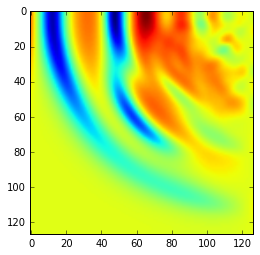

nm= FUNWAVE::u it=280 tl=0 rl=0


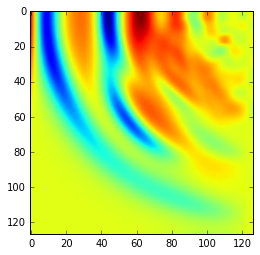

nm= FUNWAVE::u it=290 tl=0 rl=0


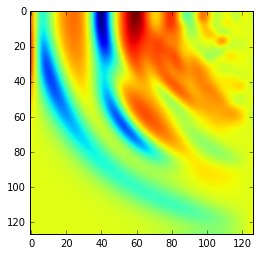

nm= FUNWAVE::u it=30 tl=0 rl=0


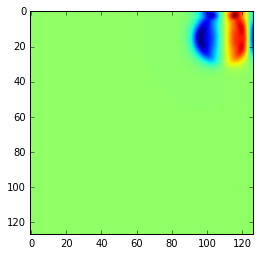

nm= FUNWAVE::u it=300 tl=0 rl=0


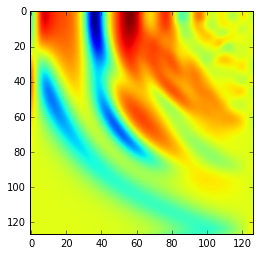

nm= FUNWAVE::u it=40 tl=0 rl=0


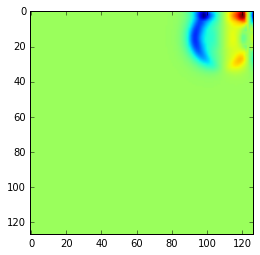

nm= FUNWAVE::u it=50 tl=0 rl=0


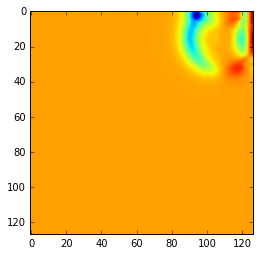

nm= FUNWAVE::u it=60 tl=0 rl=0


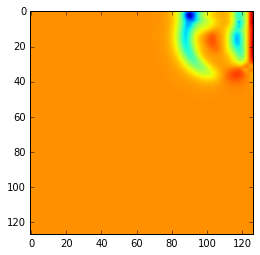

nm= FUNWAVE::u it=70 tl=0 rl=0


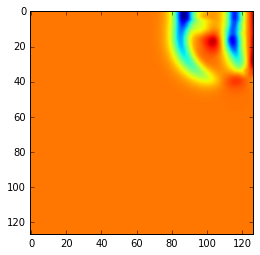

nm= FUNWAVE::u it=80 tl=0 rl=0


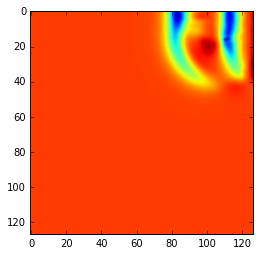

nm= FUNWAVE::u it=90 tl=0 rl=0


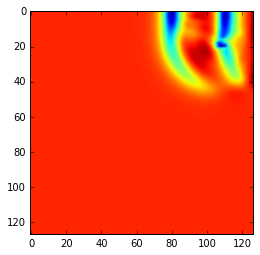

In [116]:
f5 = h5py.File("u.xy.h5")
for nm in f5:
    if not hasattr(f5[nm],"shape"):
        continue
    print("nm=",nm)
    d=np.copy(f5[nm])
    plt.figure()
    plt.imshow(d[::-1,:])
    plt.show()

Unfortunately, each set only has one component of the plot, i.e. the part belonging to one processor. To fix this, we'll
collect data sets belonging to an iteration and display them all together. In order to make this happen, we'll need the
x and y values for each component of the grid.

In [117]:
import re

In [118]:
f5x = h5py.File("x.xy.h5")
f5y = h5py.File("y.xy.h5")
x_coords = {}
y_coords = {}
for nm in f5x:
    print(nm)
    m = re.search(r'rl=.*c=\d+',nm)
    if m:
        k = m.group(0)
        x_coords[k]=np.copy(f5x[nm])
for nm in f5y:
    m = re.search(r'rl=.*c=\d+',nm)
    if m:
        k = m.group(0)
        y_coords[k]=np.copy(f5y[nm])

GRID::x it=0 tl=0 rl=0
Parameters and Global Attributes


In [122]:
f5 = h5py.File("u.xy.h5")
mn,mx = None,None

# Compute the min and max
for nm in f5:
    if not hasattr(f5[nm],"shape"):
        continue
    d5 = np.copy(f5[nm])
    tmin = np.min(d5)
    tmax = np.max(d5)
    if mn == None:
        mn,mx = tmin,tmax
    else:
        if tmin < mn:
            mn = tmin
        if tmax > mx:
            mx = tmax
            
# Collect all the pieces into the d5_tl dictionary
d5_tl = {}            
for nm in f5:
    if not hasattr(f5[nm],"shape"):
        continue
    # Parse the string nm...
    m = re.search(r'it=(\d+)\s+tl=\d+\s+(rl=(\d+)\s+c=(\d+))',nm)
    # group(1) is the iteration number
    # group(2) is "rl={number} c={number}"
    # group(3) is the number in "rl={number}"
    # group(4) is the number in "c={number}"
    grid = int(m.group(1))
    comp = int(m.group(4))
    k = m.group(2)
    if grid in d5_tl:
        d5_tl[grid]["x"] += [x_coords[k]] # append to the x array
        d5_tl[grid]["y"] += [y_coords[k]] # append to the y array
        d5_tl[grid]["D"] += [f5[nm]] # append to the data array
    else:
        d5_tl[grid] = {
            "x":[x_coords[k]],
            "y":[y_coords[k]],
            "D":[f5[nm]]
        }

# Sort the keys so that we display time levels in order
def keysetf(d):
    a = [] # create an empty list
    for k in d: # for each key in d
        a.append(k) # append it to the list
    return a
kys = keysetf(d5_tl.keys())
kys.sort()

# Show the figures, combing data from the same time level
for index in kys:
    data = d5_tl[index]
    print("iteration=",index)
    plt.figure() # put this before the plots you wish to combine
    plt.pcolor(data["x"][0],data["y"][0],data["D"][0],vmin=mn,vmax=mx)
    plt.pcolor(data["x"][1],data["y"][1],data["D"][1],vmin=mn,vmax=mx)
    plt.show() # show the plot.

AttributeError: 'NoneType' object has no attribute 'group'

<h3>Questions and Exercises:</h3>

* Run the above simulation using a single process instead of two. Do the plotting routines work? What changes did you have to make. What would you need to do to make it work with 3?
* Run the code at 1/2 the resolution.
* Position the Gaussian wave at a different place on the grid.
* If you wanted to change the compiler or a compiler flag, how would you go about doing that?
* If you wanted to add another thorn to the list of thorns to compile, how would you go about doing that?
* If you wanted to create a thornlist that would check out Cactus under the Foo directory instead of the CactusFW2 directory, how would you do it?

<table><tr><td>This work sponsored by NSF grants <a href="https://www.nsf.gov/awardsearch/showAward?AWD_ID=1550551"> OAC 1550551</a> and <a href="https://www.nsf.gov/awardsearch/showAward?AWD_ID=1539567"> CCF 1539567</a></td><td><img src="https://www.nsf.gov/awardsearch/images/common/nsf_logo_bottom.png"></tr></table>